In [154]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [155]:
df_full = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
len(df_full)

37137

In [156]:
df_full

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [157]:
df_full.columns = df_full.columns.str.lower().str.replace(' ', '_')

string_columns = list(df_full.dtypes[df_full.dtypes == 'object'].index)

for col in string_columns:
    df_full[col] = df_full[col].str.lower().str.replace(' ', '_')

In [158]:
df_full

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


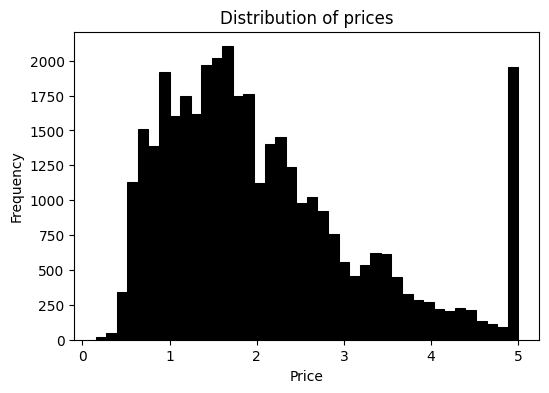

In [159]:
plt.figure(figsize=(6, 4))

sns.histplot(df_full.medhouseval, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [160]:
df_full.isnull().sum()

id             0
medinc         0
houseage       0
averooms       0
avebedrms      0
population     0
aveoccup       0
latitude       0
longitude      0
medhouseval    0
dtype: int64

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
df_train, df_val = train_test_split(df_full, test_size=0.33, random_state=11)

In [163]:
len(df_train),len(df_val)

(24881, 12256)

In [164]:
y_train_orig = df_train.medhouseval.values
y_val_orig = df_val.medhouseval.values
y_full_orig=df_full.medhouseval.values



In [165]:
y_train = np.log1p(df_train.medhouseval.values)
y_val = np.log1p(df_val.medhouseval.values)
y_full=np.log1p(df_full.medhouseval.values)

del df_full['medhouseval']
del df_train['medhouseval']
del df_val['medhouseval']


In [166]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [167]:
base = ['medinc', 'houseage', 'averooms', 'avebedrms', 'population','aveoccup','latitude', 'longitude']

In [168]:
df_full.columns

Index(['id', 'medinc', 'houseage', 'averooms', 'avebedrms', 'population',
       'aveoccup', 'latitude', 'longitude'],
      dtype='object')

In [169]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [170]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [171]:
y_pred = w_0 + X_train.dot(w)

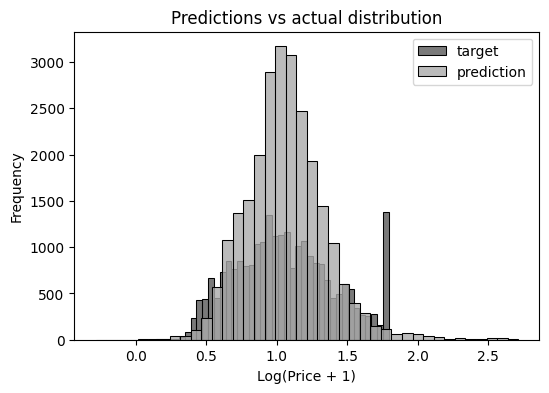

In [172]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [173]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [174]:
rmse(y_train, y_pred)

0.21992437726973127

In [175]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val,y_pred)

0.21817794140787505

In [176]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [177]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.21992574334123327
val 0.21814991223388425


In [178]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.21817793843913727
0.0001 0.21817764470500547
 0.001 0.2181749895041782
  0.01 0.21814991223388425
   0.1 0.21802637752950826
     1 0.2208188358941497
     5 0.22851465986381722
    10 0.23110551049403633


In [181]:
X_full = prepare_X(df_full)
w_0, w = train_linear_regression_reg(X_full, y_full, r=0.01)

y_pred = w_0 + X_full.dot(w)
print('train', rmse(y_full, y_pred))

train 0.21925528904918837


In [190]:
base
df_test.columns
df_train.columns

Index(['id', 'medinc', 'houseage', 'averooms', 'avebedrms', 'population',
       'aveoccup', 'latitude', 'longitude'],
      dtype='object')

In [191]:
df_test.columns = df_test.columns.str.lower()
X_test = prepare_X(df_test)
y_test_pred = w_0 + X_test.dot(w)
results = df_test[['id']].copy()
results['medhouseval'] = np.expm1(y_test_pred)
results.to_csv('test_predictions.csv', index=False)

In [188]:
df_test

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98
